In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Step 1: Load and Explore the Dataset
Use os and Pandas to inspect the dataset structure.

In [10]:
# Define paths
train_dir = '/Users/TAYAB/Advantures/Master/Assignments/1st Semester/ML Techniques/Assignment02/tumar dataset/Training'
test_dir = '/Users/TAYAB/Advantures/Master/Assignments/1st Semester/ML Techniques/Assignment02/tumar dataset/Testing'

# Check the contents of the directories
print("Training set classes:", os.listdir(train_dir))
print("Testing set classes:", os.listdir(test_dir))

Training set classes: ['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']
Testing set classes: ['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']


## Step 2: Visualize the Dataset
Use libraries like matplotlib and seaborn to visualize the data distribution.

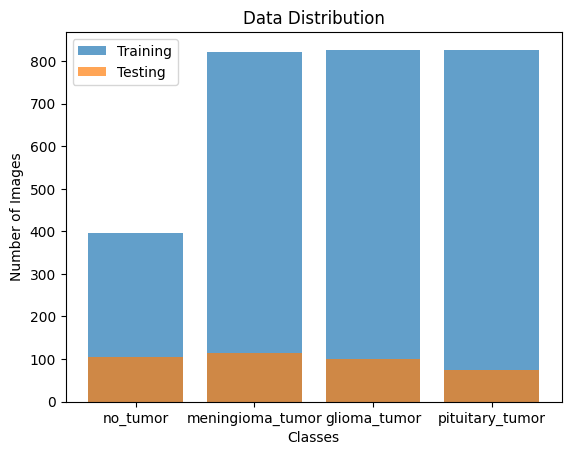

In [11]:
# Count the number of images in each class for training and testing
train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
test_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}

# Plot the distribution
plt.bar(train_counts.keys(), train_counts.values(), alpha=0.7, label='Training')
plt.bar(test_counts.keys(), test_counts.values(), alpha=0.7, label='Testing')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Data Distribution')
plt.legend()
plt.show()

## Step 3: Preprocess Images
Load and preprocess the images using libraries like Pillow or OpenCV, and prepare them for analysis.

In [12]:
# Example: Load a single image and resize it
image_path = os.path.join(train_dir, 'glioma_tumor', 'gg (1).jpg')  # Replace with actual path
image = Image.open(image_path).resize((128, 128))  # Resize to 128x128
image_array = np.array(image)

print("Image shape:", image_array.shape)

Image shape: (128, 128, 3)


## Step 4: Build a Dataset Pipeline
Use ImageDataGenerator from TensorFlow or torchvision.datasets.ImageFolder for PyTorch.

In [14]:
# # Define ImageDataGenerator for training and testing
# train_gen = ImageDataGenerator(rescale=1./255)
# test_gen = ImageDataGenerator(rescale=1./255)

# train_data = train_gen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')
# test_data = test_gen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

In [15]:
# # Define transformations
# transform = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])

# # Load datasets
# train_data = datasets.ImageFolder(train_dir, transform=transform)
# test_data = datasets.ImageFolder(test_dir, transform=transform)

# train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

## Step 5: Model Building
You can build a CNN using TensorFlow/Keras or PyTorch.

In [16]:
# Build a simple CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_counts), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    16,257,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,258,564 (62.02 MB)

 Trainable params: 16,258,564 (62.02 MB)

 Non-trainable params: 0 (0.00 B)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.4674 - loss: 2.4092 - val_accuracy: 0.5558 - val_loss: 1.6399
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.8693 - loss: 0.3634 - val_accuracy: 0.6548 - val_loss: 1.7360
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9633 - loss: 0.1397 - val_accuracy: 0.7335 - val_loss: 1.9399
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9917 - loss: 0.0504 - val_accuracy: 0.7437 - val_loss: 2.3658
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9964 - loss: 0.0256 - val_accuracy: 0.7716 - val_loss: 2.5666
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9999 - loss: 0.0082 - val_accuracy: 0.7614 - val_loss: 2.8522
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.7716 - val_loss: 2.8993
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.7589 - val_loss: 2.

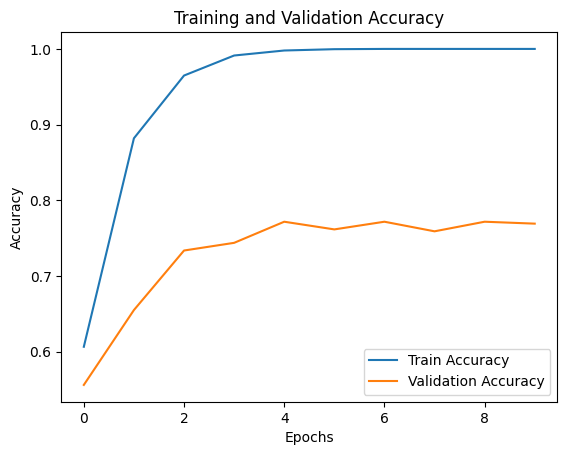

In [17]:
# Define ImageDataGenerator for training and validation
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(train_data, epochs=10, validation_data=test_data)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Step 7: Analyze the Results
Evaluate the model on the test dataset and visualize performance metrics like a confusion matrix.


In [19]:
# Predictions
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


                  precision    recall  f1-score   support

    glioma_tumor       0.28      0.05      0.08       100
meningioma_tumor       0.34      0.42      0.38       115
        no_tumor       0.27      0.40      0.32       105
 pituitary_tumor       0.23      0.26      0.25        74

        accuracy                           0.29       394
       macro avg       0.28      0.28      0.26       394
    weighted avg       0.29      0.29      0.26       394



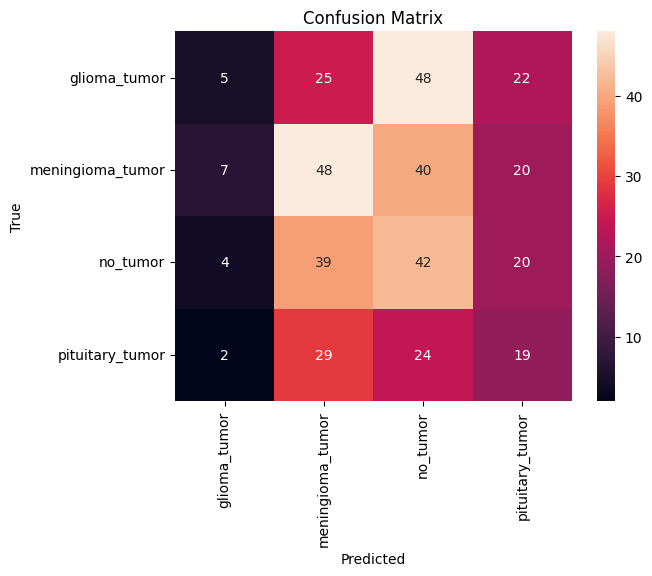

In [20]:
# Classification report
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Key Points
Replace paths and class names with your actual dataset details.
Adjust the preprocessing and model architecture based on your dataset and goals.
Experiment with data augmentation and transfer learning for better performance.

# KNN Model

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
import numpy as np

# Define the model using Functional API
inputs = Input(shape=(128, 128, 3))  # Input layer
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)  # Output layer with 4 classes

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use the model as a feature extractor
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)


In [21]:
# Initialize the model by calling it
dummy_input = np.zeros((1, 128, 128, 3))  # Dummy data to validate the model
_ = model(dummy_input)  # Build the model

# Check feature extractor functionality
print(feature_extractor.summary())


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    16,257,152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,258,048 (62.02 MB)

 Trainable params: 16,258,048 (62.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
def extract_features(generator, feature_extractor):
    features = []
    labels = []
    for inputs, targets in generator:
        features_batch = feature_extractor.predict(inputs)
        features.append(features_batch)
        labels.append(targets)
        if generator.batch_index == 0:  # Stop after one epoch
            break
    return np.vstack(features), np.vstack(labels)

# Extract features
train_features, train_labels = extract_features(train_data, feature_extractor)
test_features, test_labels = extract_features(test_data, feature_extractor)

# Convert one-hot labels to integers
train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [23]:
# Train KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)



KNeighborsClassifier()

In [24]:
# Predict and evaluate
knn_predictions = knn.predict(test_features)
print(classification_report(test_labels, knn_predictions, target_names=test_data.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(test_labels, knn_predictions)


                  precision    recall  f1-score   support

    glioma_tumor       0.41      0.22      0.29       100
meningioma_tumor       0.70      0.54      0.61       115
        no_tumor       0.59      0.76      0.67       105
 pituitary_tumor       0.44      0.70      0.54        74

        accuracy                           0.55       394
       macro avg       0.54      0.56      0.53       394
    weighted avg       0.55      0.55      0.53       394



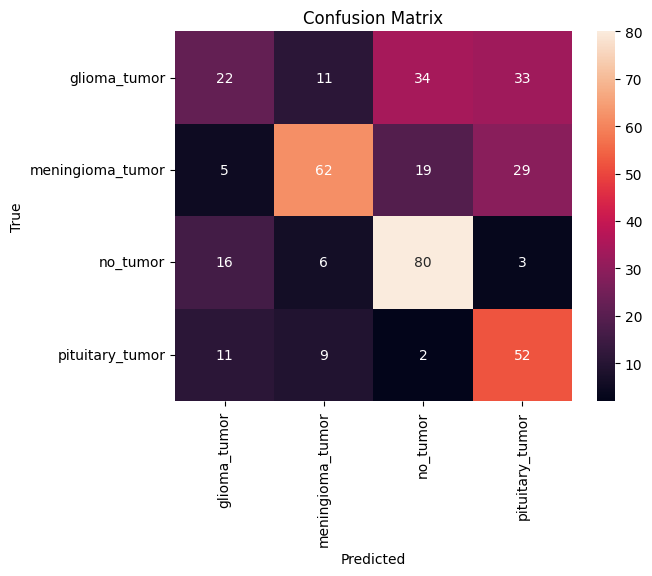

In [25]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# SVM Model 

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)  # You can experiment with other kernels like 'rbf', 'poly', etc.
svm.fit(train_features, train_labels)


SVC(kernel='linear', random_state=42)

In [27]:
# Predict and evaluate
svm_predictions = svm.predict(test_features)

# Print classification report
print(classification_report(test_labels, svm_predictions, target_names=test_data.class_indices.keys()))



                  precision    recall  f1-score   support

    glioma_tumor       0.36      0.19      0.25       100
meningioma_tumor       0.34      0.39      0.36       115
        no_tumor       0.29      0.35      0.32       105
 pituitary_tumor       0.49      0.54      0.51        74

        accuracy                           0.36       394
       macro avg       0.37      0.37      0.36       394
    weighted avg       0.36      0.36      0.35       394



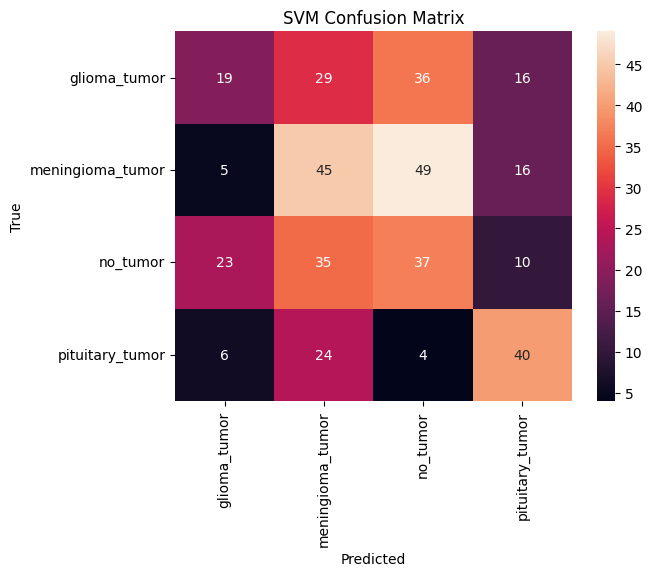

In [28]:
# Confusion matrix
cm = confusion_matrix(test_labels, svm_predictions)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()